# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Importing Libraries

In [179]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

## Load Data

In [180]:
df = pd.read_csv("Bus_Breakdown_and_Delays.csv")
df_c = df.copy()

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

 ### data types distribution.

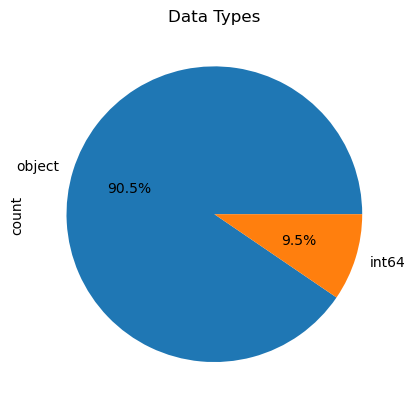

In [181]:
df.dtypes.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Data Types') 
plt.show()

<Axes: >

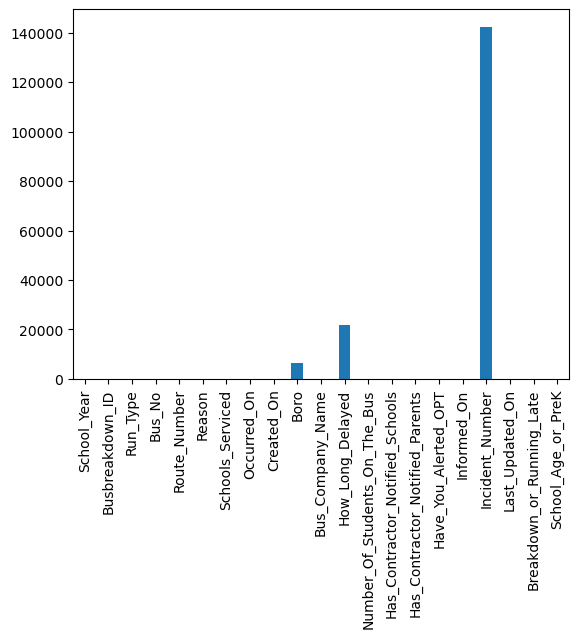

In [182]:
df.isnull().sum().plot(kind='bar')

In [183]:
df_c.head().T

0  \
School_Year                                   2015-2016   
Busbreakdown_ID                                 1224901   
Run_Type                                       Pre-K/EI   
Bus_No                                              811   
Route_Number                                          1   
Reason                                            Other   
Schools_Serviced                                   C353   
Occurred_On                      10/26/2015 08:30:00 AM   
Created_On                       10/26/2015 08:40:00 AM   
Boro                                              Bronx   
Bus_Company_Name                           G.V.C., LTD.   
How_Long_Delayed                              10MINUTES   
Number_Of_Students_On_The_Bus                         5   
Has_Contractor_Notified_Schools                     Yes   
Has_Contractor_Notified_Parents                     Yes   
Have_You_Alerted_OPT                                 No   
Informed_On                      10/26/2015 08:40:00 AM   
Incident_Number                                     NaN   
Last_Updated_On                  10/26/2015 08:40:39 AM   
Breakdown_or_Running_Late                  Running Late   
School_Age_or_PreK                                Pre-K   

                                                      1  \
School_Year                                   2015-2016   
Busbreakdown_ID                                 1225098   
Run_Type                                       Pre-K/EI   
Bus_No                                             9302   
Route_Number                                          1   
Reason                                    Heavy Traffic   
Schools_Serviced                                   C814   
Occurred_On                      10/27/2015 07:10:00 AM   
Created_On                       10/27/2015 07:11:00 AM   
Boro                                              Bronx   
Bus_Company_Name                           G.V.C., LTD.   
How_Long_Delayed                             25 MINUTES   
Number_Of_Students_On_The_Bus                         3   
Has_Contractor_Notified_Schools                     Yes   
Has_Contractor_Notified_Parents                     Yes   
Have_You_Alerted_OPT                                 No   
Informed_On                      10/27/2015 07:11:00 AM   
Incident_Number                                     NaN   
Last_Updated_On                  10/27/2015 07:11:22 AM   
Breakdown_or_Running_Late                  Running Late   
School_Age_or_PreK                                Pre-K   

                                                      2  \
School_Year                                   2015-2016   
Busbreakdown_ID                                 1215800   
Run_Type                                       Pre-K/EI   
Bus_No                                              358   
Route_Number                                          2   
Reason                                    Heavy Traffic   
Schools_Serviced                                   C195   
Occurred_On                      09/18/2015 07:36:00 AM   
Created_On                       09/18/2015 07:38:00 AM   
Boro                                              Bronx   
Bus_Company_Name                           G.V.C., LTD.   
How_Long_Delayed                             15 MINUTES   
Number_Of_Students_On_The_Bus                        12   
Has_Contractor_Notified_Schools                     Yes   
Has_Contractor_Notified_Parents                     Yes   
Have_You_Alerted_OPT                                Yes   
Informed_On                      09/18/2015 07:38:00 AM   
Incident_Number                                     NaN   
Last_Updated_On                  09/18/2015 07:38:44 AM   
Breakdown_or_Running_Late                  Running Late   
School_Age_or_PreK                                Pre-K   

                                                      3  \
School_Year                                   2015-2016   
Busbreakdown_ID                        

In [184]:
df.describe(include='O').T

count  unique                     top  \
School_Year                      147972       4               2016-2017   
Run_Type                         147883      10       Special Ed AM Run   
Bus_No                           147972   10765                    9354   
Route_Number                     147884   11283                       1   
Reason                           147870      10           Heavy Traffic   
Schools_Serviced                 147972    5180                    C814   
Occurred_On                      147972   70108  01/25/2016 07:30:00 AM   
Created_On                       147972   75822  01/26/2016 07:57:00 AM   
Boro                             141654      11                   Bronx   
Bus_Company_Name                 147972      91            G.V.C., LTD.   
How_Long_Delayed                 126342    1863                 20 MINS   
Has_Contractor_Notified_Schools  147972       2                     Yes   
Has_Contractor_Notified_Parents  147972       2                     Yes   
Have_You_Alerted_OPT             147972       2                      No   
Informed_On                      147972   75822  01/26/2016 07:57:00 AM   
Incident_Number                    5632    4666                       x   
Last_Updated_On                  147972  145769  12/20/2016 02:31:32 PM   
Breakdown_or_Running_Late        147972       2            Running Late   
School_Age_or_PreK               147972       2              School-Age   

                                   freq  
School_Year                       83141  
Run_Type                          85990  
Bus_No                              468  
Route_Number                       2569  
Reason                            87426  
Schools_Serviced                   1735  
Occurred_On                          39  
Created_On                           19  
Boro                              40995  
Bus_Company_Name                  14198  
How_Long_Delayed                   5662  
Has_Contractor_Notified_Schools  139127  
Has_Contractor_Notified_Parents  113098  
Have_You_Alerted_OPT             101355  
Informed_On                          19  
Incident_Number                     113  
Last_Updated_On                       4  
Breakdown_or_Running_Late        130857  
School_Age_or_PreK               127003

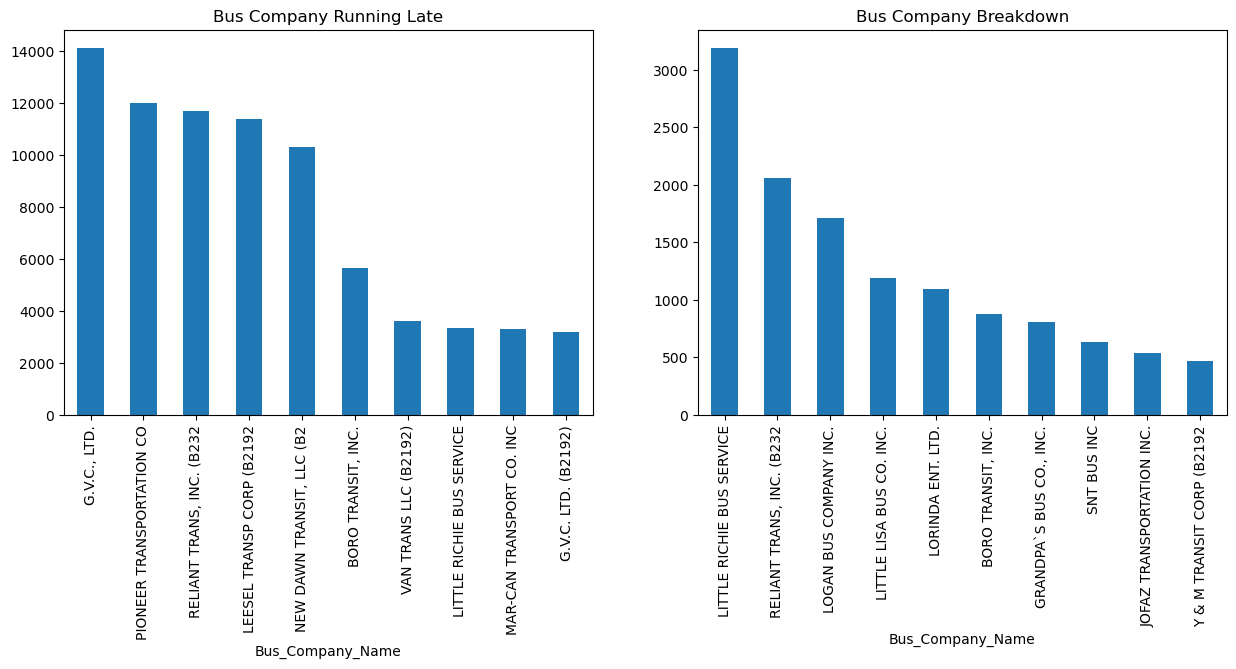

In [185]:
bus_company_running_late = df['Bus_Company_Name'].where(df['Breakdown_or_Running_Late'] == 'Running Late').value_counts().head(10)
bus_company_breakdown = df['Bus_Company_Name'].where(df['Breakdown_or_Running_Late'] == 'Breakdown').value_counts().head(10)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
bus_company_running_late.plot(kind='bar', ax=ax[0])
ax[0].set_title('Bus Company Running Late')
bus_company_breakdown.plot(kind='bar', ax=ax[1])
ax[1].set_title('Bus Company Breakdown')
plt.show()

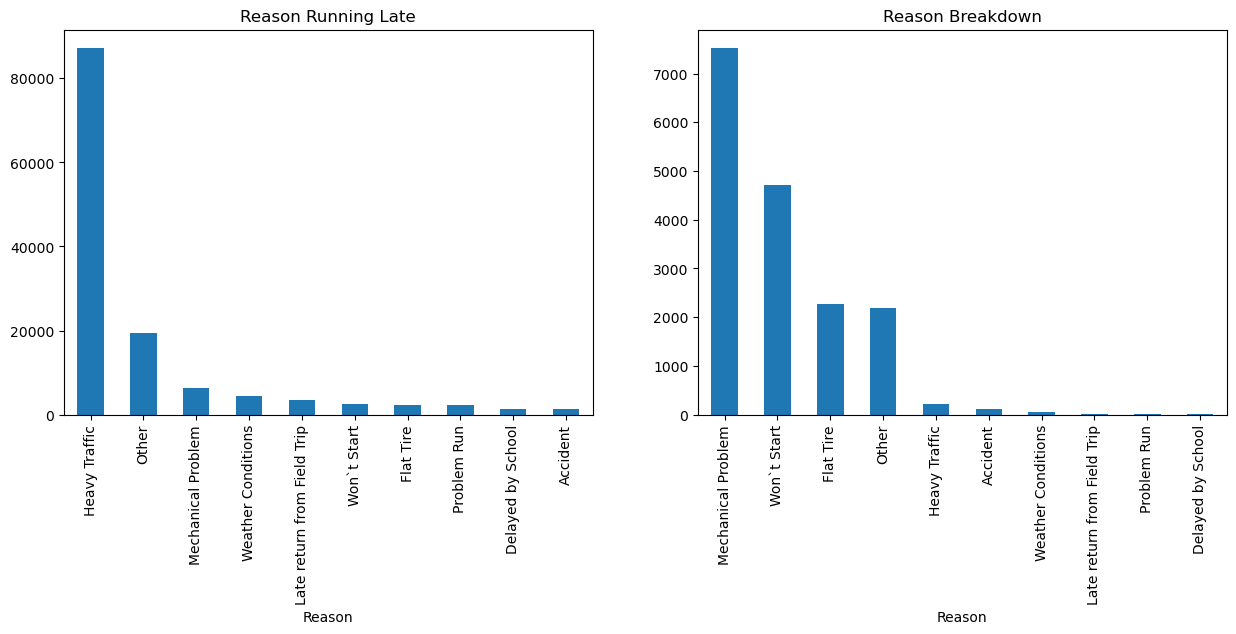

In [186]:
reson_running_late = df['Reason'].where(df['Breakdown_or_Running_Late'] == 'Running Late').value_counts().head(10)
reson_breakdown = df['Reason'].where(df['Breakdown_or_Running_Late'] == 'Breakdown').value_counts().head(10)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
reson_running_late.plot(kind='bar', ax=ax[0])
ax[0].set_title('Reason Running Late')
reson_breakdown.plot(kind='bar', ax=ax[1])
ax[1].set_title('Reason Breakdown')
plt.show()

<Axes: title={'center': 'School Age or PreK'}, xlabel='School_Age_or_PreK'>

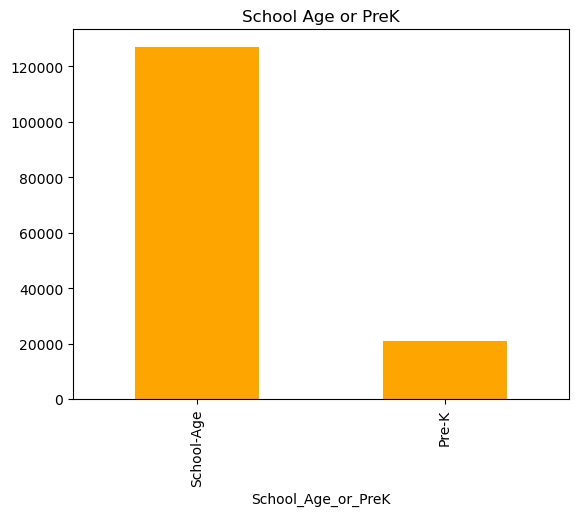

In [187]:
df['School_Age_or_PreK'].value_counts().plot(kind='bar', title='School Age or PreK', color='orange')

Text(0.5, 1.0, 'Where the most delays occur')

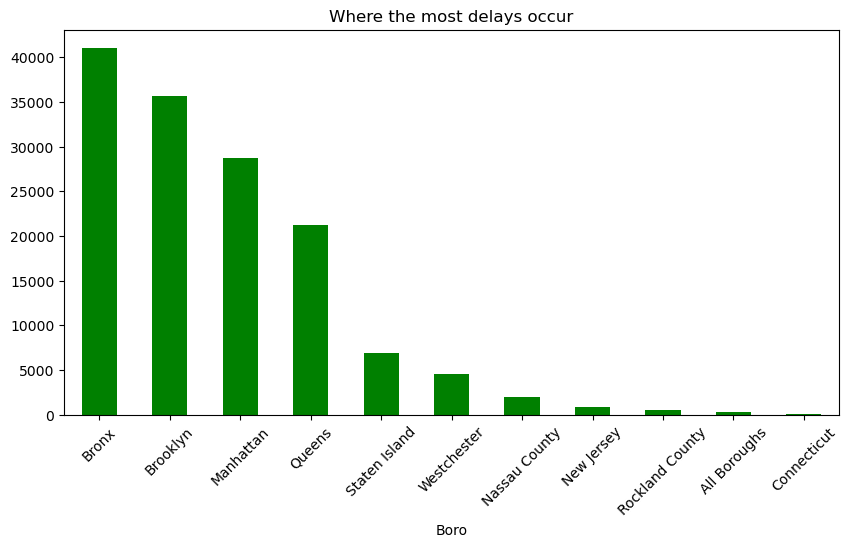

In [188]:
df['Boro'].value_counts().plot(kind='bar', title='Boro', color='green', figsize=(10, 5))
plt.xticks(rotation=45)
plt.title('Where the most delays occur')

In [206]:
df['Delay_Minutes'].head(10)

0    10
1    25
2    15
3    10
4    10
5    15
6    20
7    10
8    45
9    35
Name: Delay_Minutes, dtype: int64

In [207]:
## resons for delays with respect to time 
df['Delay_Hours'] = df['Delay_Minutes'] / 60
fig = px.pie(df, values='Delay_Hours', names='Reason', title='Reasons for delays')
fig.show()

<Axes: title={'center': 'How Long Delayed'}, xlabel='How_Long_Delayed'>

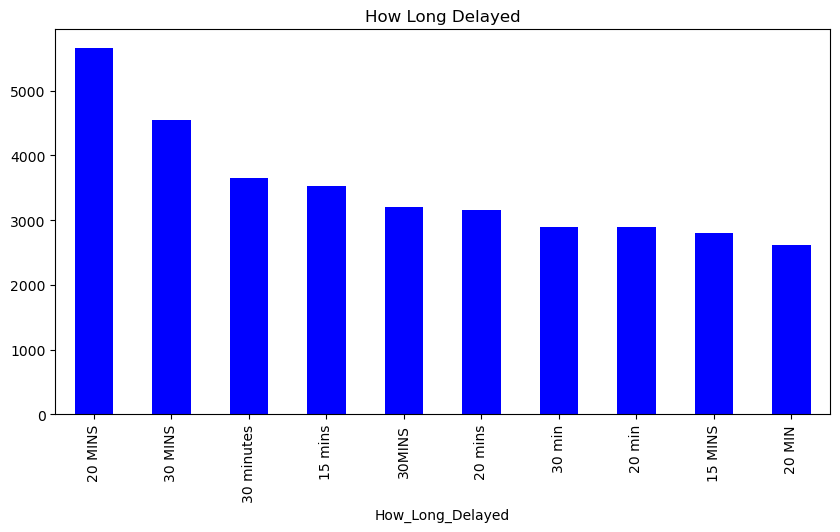

In [ ]:
df['How_Long_Delayed'].value_counts().head(10).plot(kind='bar', title='How Long Delayed', color='blue', figsize=(10, 5))

<Axes: title={'center': 'Has Contractor Notified Parents'}, xlabel='Has_Contractor_Notified_Parents'>

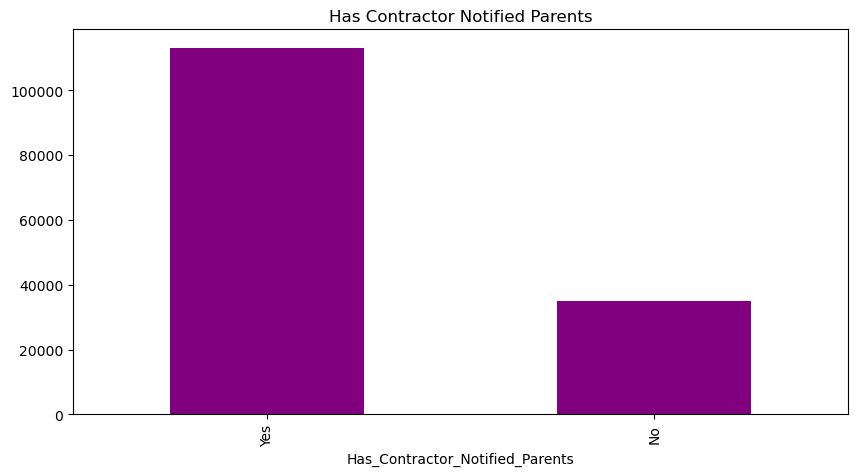

In [ ]:
df['Has_Contractor_Notified_Parents'].value_counts().plot(kind='bar', title='Has Contractor Notified Parents', color='purple', figsize=(10, 5))

<Axes: title={'center': 'Has Contractor Notified Schools'}, xlabel='Has_Contractor_Notified_Schools'>

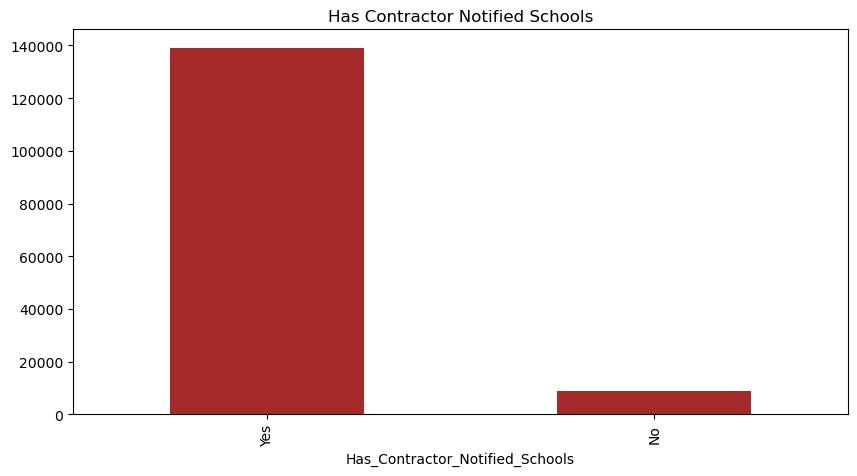

In [ ]:
df['Has_Contractor_Notified_Schools'].value_counts().plot(kind='bar', title='Has Contractor Notified Schools', color='brown', figsize=(10, 5))

In [ ]:
# time the between the occurance and the report
time_diff = pd.to_datetime(df['Created_On']) - pd.to_datetime(df['Occurred_On'])

fig = px.histogram(time_diff.dt.seconds // 3600, title='Time Difference Between Occurance and Report')
fig.show()


## let's change the dttype of the 'School_Year' to date, ''

In [ ]:
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Occurred_On_Date'] = pd.to_datetime(df['Occurred_On'])
df['Occurred_On_Date'] = df['Occurred_On'].dt.date
df['Occurred_On_Time'] = df['Occurred_On'].dt.time

In [ ]:
head_camp = df['Bus_Company_Name'].value_counts().head(10)

In [ ]:
df['Breakdown_or_Running_Late'].value_counts()

Breakdown_or_Running_Late
Running Late    130857
Breakdown        17115
Name: count, dtype: int64

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:
df.drop(columns=['Busbreakdown_ID','Bus_no', 'Bus_No', 'Incident_Number'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

School_Year                            0
Run_Type                              89
Route_Number                          88
Reason                               102
Schools_Serviced                       0
Created_On                             0
Boro                                6318
Bus_Company_Name                       0
How_Long_Delayed                   21630
Number_Of_Students_On_The_Bus          0
Has_Contractor_Notified_Schools        0
Has_Contractor_Notified_Parents        0
Have_You_Alerted_OPT                   0
Informed_On                            0
Last_Updated_On                        0
Breakdown_or_Running_Late              0
School_Age_or_PreK                     0
Occurred_On_Date                       0
Occurred_On_Time                       0
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cols = ['Run_Type', 'Reason', 'Boro', 'Route_Number', 'How_Long_Delayed']
df[cols] = imputer.fit_transform(df[cols])


In [190]:
import re
def process_range(value):
    numbers = re.findall(r'\d+', value)
    
    if len(numbers) == 1:
        return f"{numbers[0]} min"
    elif len(numbers) > 1:
        average = sum(map(int, numbers)) // len(numbers)
        return f"{average} min"
    else:
        return "0 min"  

In [191]:
df['How_Long_Delayed'] = df['How_Long_Delayed'].astype(str)
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.lower()
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace(r'mins|minutes', 'min', regex=True)
df['How_Long_Delayed'] = df['How_Long_Delayed'].apply(process_range)

df['Delay_Minutes'] = df['How_Long_Delayed'].str.extract(r'(\d+)').astype(int)
df.drop(['How_Long_Delayed'], axis=1, inplace=True)

### Label Encoder.

In [ ]:
binary_cols = ['Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT']

l_encoder = LabelEncoder()

for col in df.columns:
    df[col] = l_encoder.fit_transform(df[col])

In [ ]:
df.head().T

0       1      2      3      4
School_Year                           0       0      0      0      0
Run_Type                              3       3      3      3      3
Route_Number                         77      77    209    209    209
Reason                                6       3      3      6      6
Schools_Serviced                   5003    5071   4969   4968   5149
Created_On                        61017   61329  51829  51656  51836
Boro                                  1       1      1      1      1
Bus_Company_Name                     27      27     27     27     27
Number_Of_Students_On_The_Bus         5       3     12     11     12
Has_Contractor_Notified_Schools       1       1      1      1      1
Has_Contractor_Notified_Parents       1       1      1      1      1
Have_You_Alerted_OPT                  0       0      1      1      0
Informed_On                       61017   61329  51829  51656  51836
Last_Updated_On                  116763  117361  98486  98208  98548
Breakdown_or_Running_Late             1       1      1      1      1
School_Age_or_PreK                    0       0      0      0      0
Occurred_On_Date                     37      38     12     11     12
Occurred_On_Time                    376     296    322    354    325
Delay_Minutes                        10      25     15     10     10

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
X = df.drop(columns=['Breakdown_or_Running_Late'])
y = df['Breakdown_or_Running_Late']

In [ ]:
std_scaler = StandardScaler()

X = std_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
print(f"X Trian {X_train.shape}")
print(f"X Test {X_test.shape}\n")

print(f"y Trian {y_train.shape}")
print(f"y Test {y_test.shape}")

X Trian (118377, 18)
X Test (29595, 18)

y Trian (118377,)
y Test (29595,)


In [ ]:
y_test.value_counts()

Breakdown_or_Running_Late
1    26214
0     3381
Name: count, dtype: int64

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))

model.add(layers.Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(layers.Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(layers.Dense(units=32, activation='relu', kernel_initializer='uniform'))

model.add(layers.Dense(units=1, activation='sigmoid'))

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='../Models/model.keras',
        save_best_only=True,
        monitor='val_loss',
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,  
        restore_best_weights=True,
        verbose=1
    )
]

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 873 (3.41 KB)

 Trainable params: 873 (3.41 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [ ]:
BATCH_SIZE = 256
EPOCHS = 50

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = callbacks
)

Epoch 1/50
245/370 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8726 - loss: 0.4796
Epoch 1: val_loss improved from inf to 0.21699, saving model to ../Models/model.keras
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.8763 - loss: 0.4294 - val_accuracy: 0.8833 - val_loss: 0.2170
Epoch 2/50
277/370 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8965 - loss: 0.1961
Epoch 2: val_loss improved from 0.21699 to 0.16269, saving model to ../Models/model.keras
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.9012 - loss: 0.1926 - val_accuracy: 0.9355 - val_loss: 0.1627
Epoch 3/50
272/370 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.9381 - loss: 0.1591
Epoch 3: val_loss improved from 0.16269 to 0.15265, saving model to ../Models/model.keras
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.9384 - loss: 0.1580 - val_accuracy: 0.9382 - val_loss: 0.1527
Epoch 4/50
279/370 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.9400 - loss: 0.1515
Epoch 4: val_loss improve

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
test_model = keras.models.load_model('../Models/model.keras')

loss, test_acc = test_model.evaluate(X_test, y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9540 - loss: 0.1073


In [ ]:
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Loss: {loss:.4f}')

Test Accuracy: 0.9541
Loss: 0.1053


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
predications = test_model.predict(X_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step


In [ ]:
binary_predictions = (predications > 0.5).astype(int)

print(f'Accuracy: {accuracy_score(y_test, binary_predictions)*100:.2f}%')

Accuracy: 95.41%


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
history_dict = history.history

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

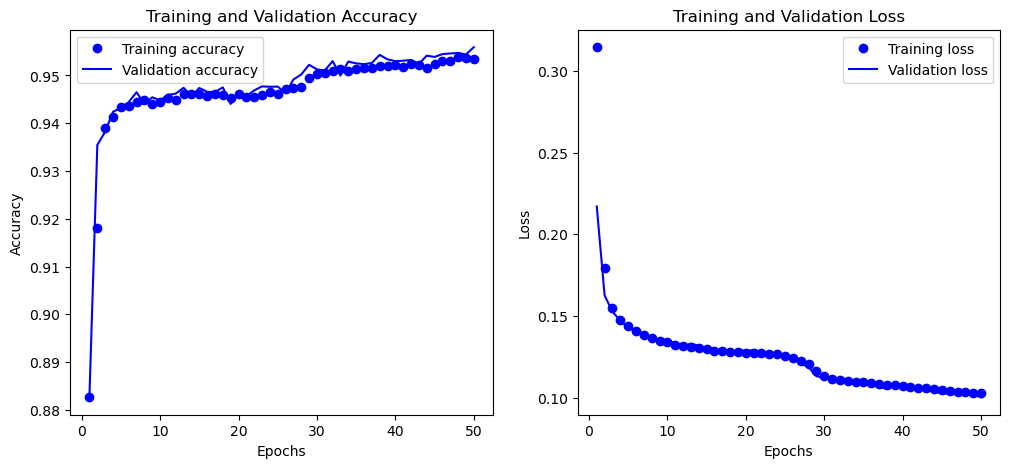

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('../Models/model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: